## Part 1

<img src="chart_segment.png" alt="Chart Function">

In [2]:
# import lib
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#import data
df = pd.read_csv(r'https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

#inspect data
df                 

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000
...,...,...,...,...,...,...,...,...,...
4995,1724011,2019-12-01,12838,Tangerang,Banten,P3047,BRAND_R,2,450000
4996,1676302,2019-07-28,13833,Bogor,Jawa Barat,P0760,BRAND_C,3,1465000
4997,1706071,2019-10-23,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4,747000
4998,1703620,2019-10-17,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8,695000


## Explain Data

<ol>
  <li>order_id:</li>
  <p>ID dari order/transaksi, 1 transaksi bisa terdiri dari beberapa produk, tetapi hanya dilakukan oleh 1 customer</p>
  <li>order_date</li>
  <p>tanggal terjadinya transaksi customer_id : ID dari pembeli, bisa jadi dalam satu hari, 1 customer melakukan transaksi beberapa kali</p>
  <li>city:</li>
  <p>kota tempat toko terjadinya transaksi</p>
  <li>province:</li>
  <p>provinsi (berdasarkan city)</p>
  <li>product_id:</li>
  <p>ID dari suatu product yang dibeli</p>
  <li>brand:</li>
  <p>brand/merk dari product. Suatu product yang sama pasti memiliki brand yang sama</p>
  <li>quantity:</li>
  <p>Kuantitas/banyaknya product yang dibeli</p>
  <li>item_price:</li>
  <p>Harga dari 1 product (dalam Rupiah). Suatu product yang sama, bisa jadi memiliki harga yang berbeda saat dibeli</p>
</ol>

In [4]:
# info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     5000 non-null   int64 
 1   order_date   5000 non-null   object
 2   customer_id  5000 non-null   int64 
 3   city         5000 non-null   object
 4   province     5000 non-null   object
 5   product_id   5000 non-null   object
 6   brand        5000 non-null   object
 7   quantity     5000 non-null   int64 
 8   item_price   5000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 351.7+ KB


In [5]:
# change type order date from str to date
df.order_date = pd.to_datetime(df.order_date)

#inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     5000 non-null   int64         
 1   order_date   5000 non-null   datetime64[ns]
 2   customer_id  5000 non-null   int64         
 3   city         5000 non-null   object        
 4   province     5000 non-null   object        
 5   product_id   5000 non-null   object        
 6   brand        5000 non-null   object        
 7   quantity     5000 non-null   int64         
 8   item_price   5000 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 351.7+ KB


In [6]:
# adding new column year-month for create line chart later
df['year_month'] = df.order_date.apply(lambda x: x.strftime('%Y-%m'))

#inspect data
df

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,year_month
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10
...,...,...,...,...,...,...,...,...,...,...
4995,1724011,2019-12-01,12838,Tangerang,Banten,P3047,BRAND_R,2,450000,2019-12
4996,1676302,2019-07-28,13833,Bogor,Jawa Barat,P0760,BRAND_C,3,1465000,2019-07
4997,1706071,2019-10-23,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4,747000,2019-10
4998,1703620,2019-10-17,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8,695000,2019-10


In [7]:
# adding gmv (gross merchandise values)
df['gmv'] = df.quantity * df.item_price

#inspect data
df

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,year_month,gmv
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08,820000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000
...,...,...,...,...,...,...,...,...,...,...,...
4995,1724011,2019-12-01,12838,Tangerang,Banten,P3047,BRAND_R,2,450000,2019-12,900000
4996,1676302,2019-07-28,13833,Bogor,Jawa Barat,P0760,BRAND_C,3,1465000,2019-07,4395000
4997,1706071,2019-10-23,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4,747000,2019-10,2988000
4998,1703620,2019-10-17,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8,695000,2019-10,5560000


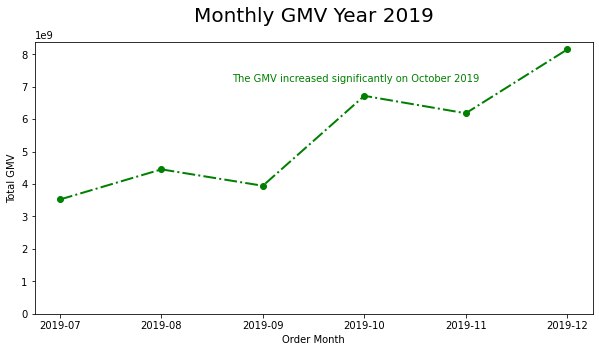

In [8]:
# let's group sales by year month
df.groupby('year_month')['gmv'].sum()

# set size chart
fig = plt.figure(figsize=(10,5))
# visualize with matplotlib
df.groupby('year_month')['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
# remember y-axis makesure start from 0
plt.ylim(ymin=0)
# set title
plt.title('Monthly GMV Year 2019', pad=20, fontsize=20)
# set x and y label
plt.xlabel('Order Month')
plt.ylabel('Total GMV')
# highlight position chart
plt.text(0.4, 0.77, 'The GMV increased significantly on October 2019', transform= fig.transFigure, color='green')
# show chart
plt.show()
# save plot
# plt.savefig('monthly_gmv.png', quality=95) #quality only work on png or peg

<function matplotlib.pyplot.show(close=None, block=None)>

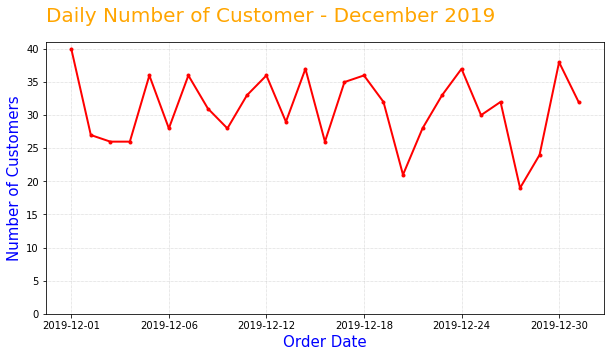

In [9]:
# Import library yang dibutuhkan
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Baca dataset https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
# Buat kolom order_month
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat kolom gmv
dataset['gmv'] = dataset['item_price'] * dataset['quantity']
# Plot grafik sesuai dengan instruksi
plt.figure(figsize=(10,5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Daily Number of Customer - December 2019', loc='left', pad=20, fontsize=20, color='orange')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show

## Part 2

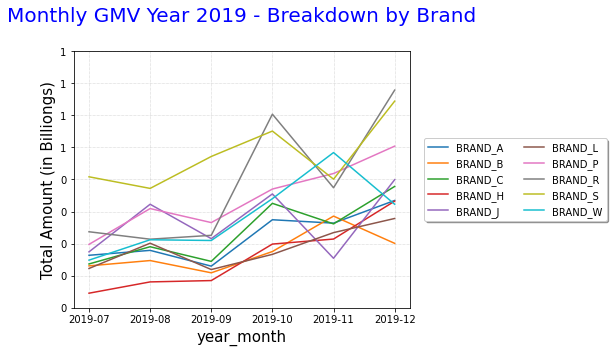

In [10]:
# multi line chart
df.groupby(['year_month', 'brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand', loc= 'center', pad= 30, fontsize= 20, color='blue')
plt.xlabel('year_month', fontsize= 15)
plt.ylabel('Total Amount (in Billiongs)', fontsize= 15)
plt.grid(color= 'darkgray', linestyle= ':', linewidth= 0.5)
# legend option
plt.legend(loc= 'right', bbox_to_anchor=(1.6,0.5), shadow=True, ncol=2)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

In [11]:
# top gmv by province
top_province = df.groupby(['province'])['gmv'].sum() \
                .reset_index().sort_values(by= 'gmv', ascending=False).head(5)
print(top_province)

# apply result and adding to df, only show top 5 province and change except this list to other
df['top_province'] = df.province.apply(lambda x: x if (x in top_province.province.to_list()) else 'Other')

#inspect data
df

      province          gmv
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,year_month,gmv,top_province
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000,DKI Jakarta
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000,DKI Jakarta
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000,DKI Jakarta
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08,820000,DKI Jakarta
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000,DKI Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1724011,2019-12-01,12838,Tangerang,Banten,P3047,BRAND_R,2,450000,2019-12,900000,Other
4996,1676302,2019-07-28,13833,Bogor,Jawa Barat,P0760,BRAND_C,3,1465000,2019-07,4395000,Jawa Barat
4997,1706071,2019-10-23,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4,747000,2019-10,2988000,DKI Jakarta
4998,1703620,2019-10-17,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8,695000,2019-10,5560000,DKI Jakarta


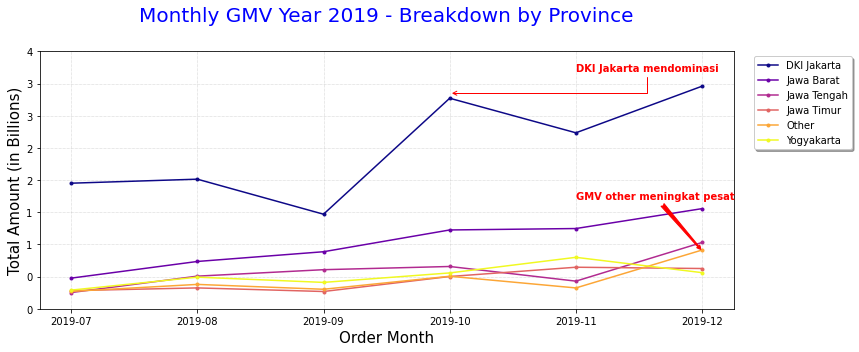

In [12]:
#visualize top 5 province
df.groupby(['year_month','top_province'])['gmv'].sum().unstack().plot(marker= '.', cmap= 'plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province', loc= 'center', pad=30, fontsize= 20, color= 'blue')
plt.xlabel('Order Month', fontsize= 15)
plt.ylabel('Total Amount (in Billions)', fontsize= 15)
plt.grid(color= 'darkgray', linestyle= ':', linewidth= 0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc= 'upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(12,5)
plt.tight_layout()

# Anotasi pertama
plt.annotate('GMV other meningkat pesat', xy=(5, 900000000),
			 xytext=(4, 1700000000), weight='bold', color='red',
			 arrowprops=dict(arrowstyle='fancy',
							connectionstyle='arc3',
							color='red'))

# Anotasi kedua
plt.annotate('DKI Jakarta mendominasi', xy=(3, 3350000000),
			 xytext=(4, 3700000000), weight='bold', color='red',
			 arrowprops=dict(arrowstyle='->',
							connectionstyle='angle',
							color='red'))
plt.show()

In [13]:
# let's analyze only DKI cause in oct to dec the gmv increase significantly
df_dki_q4 = df.loc[(df['province']=='DKI Jakarta') & (df['year_month'] >= '2019-10')]
df_dki_q4

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,year_month,gmv,top_province
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000,DKI Jakarta
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000,DKI Jakarta
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000,DKI Jakarta
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000,DKI Jakarta
6,1711399,2019-11-04,16791,Jakarta Barat,DKI Jakarta,P0860,BRAND_C,1,1465000,2019-11,1465000,DKI Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...
4976,1736803,2019-12-22,14577,Jakarta Selatan,DKI Jakarta,P0753,BRAND_C,2,1500000,2019-12,3000000,DKI Jakarta
4992,1734787,2019-12-18,18283,Jakarta Selatan,DKI Jakarta,P0734,BRAND_C,2,310000,2019-12,620000,DKI Jakarta
4997,1706071,2019-10-23,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4,747000,2019-10,2988000,DKI Jakarta
4998,1703620,2019-10-17,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8,695000,2019-10,5560000,DKI Jakarta


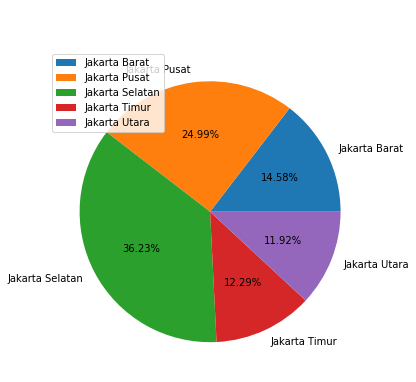

In [14]:
# visualize city dki q4
gmv_per_city_dki_q4 = df_dki_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize = (6,6))
plt.pie(gmv_per_city_dki_q4['gmv'], labels = gmv_per_city_dki_q4['city'], autopct = '%1.2f%%')
plt.title('GMV Contribution Per City- DKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='white')
plt.legend()
plt.show()

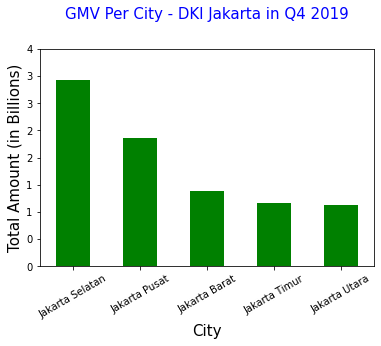

In [15]:
# with bar chart
gmv_per_city_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('GMV Per City - DKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('City', fontsize= 15)
plt.ylabel('Total Amount (in Billions)', fontsize= 15)
plt.ylim(ymin= 0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation= 30)
plt.show()

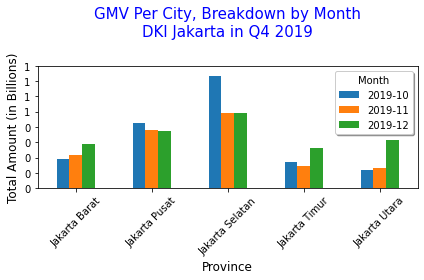

In [16]:
# with unstack bar chart
df_dki_q4.groupby(['city', 'year_month'])['gmv'].sum().unstack().plot(kind='bar')
plt.title('GMV Per City, Breakdown by Month\nDKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Province', fontsize= 12)
plt.ylabel('Total Amount (in Billions)', fontsize= 12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, title= 'Month')
plt.ylim(ymin= 0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

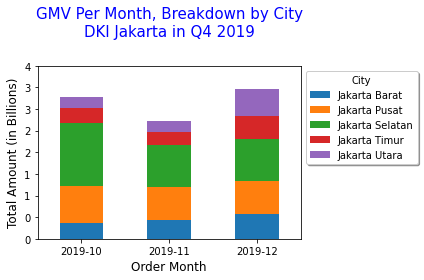

In [17]:
# with stacked barchart
df_dki_q4.groupby(['year_month', 'city'])['gmv'].sum().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True)
plt.title('GMV Per Month, Breakdown by City\nDKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Order Month', fontsize= 12)
plt.ylabel('Total Amount (in Billions)', fontsize= 12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, ncol=1, title= 'City')
plt.ylim(ymin= 0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation= 0)
plt.tight_layout()
plt.show()

In [21]:
# let's analyze total gmv, count customer and total qty by customer
analyze_customer = df_dki_q4.groupby('customer_id').\
                    agg({'order_id' : 'nunique',                          'quantity' : 'sum',
                    'gmv' : 'sum'}).reset_index().rename(columns={'order_id' : 'orders'})
analyze_customer

,customer_id,orders,quantity,gmv
0,12748,29,557,175286000
1,12839,4,91,45925000
2,12841,2,8,5385000
3,12849,1,2,3490000
4,12867,1,32,16207000
...,...,...,...,...
706,18229,1,42,29574000
707,18237,1,1,4475000
708,18242,1,24,21696000
709,18252,1,5,4313000


<Figure size 432x288 with 0 Axes>

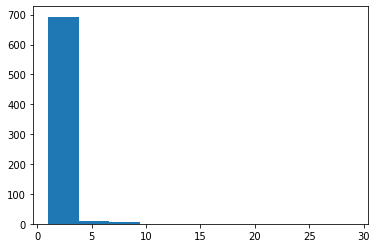

In [23]:
#  create histogram
'''
bins: jumlah bin (kelompok nilai) yang diinginkan
range: nilai minimum dan maksimum yang ditampilkan
orientation: ‘horizontal’ atau ‘vertikal’
color: warna bar di histogram
'''
plt.clf()
plt.figure()
plt.hist(analyze_customer.orders)
plt.show()

'''
Terlihat bahwa datanya terlalu berat ke kiri, hampir semua customer hanya bertransaksi kurang dari 10, maka dari itu perlu set range-nya, misalnya hanya dari 1 sampai 5.
'''

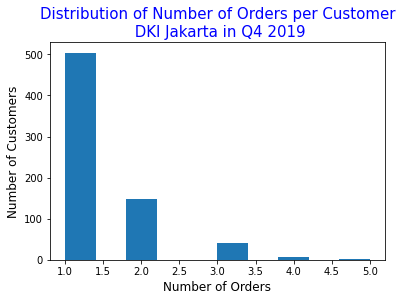

In [25]:
plt.figure()
plt.hist(analyze_customer.orders, range=(1,5))
plt.title('Distribution of Number of Orders per Customer\n DKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

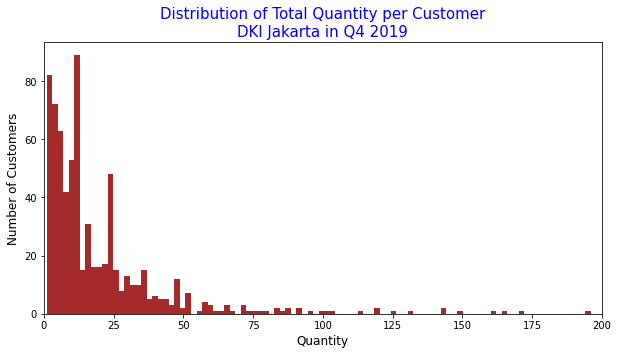

In [28]:
# distribution quantity
plt.figure(figsize=(10,5))
plt.hist(analyze_customer['quantity'], bins=100, range=(1,200), color='brown')
plt.title('Distribution of Total Quantity per Customer\nDKI Jakarta in Q4 2019', fontsize= 15, color='blue')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlim(xmin=0, xmax=200)
plt.show()

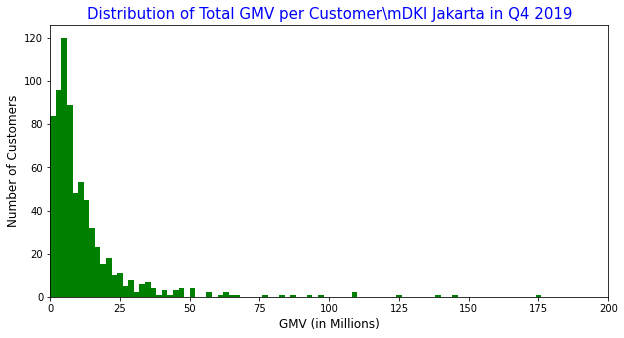

In [27]:
# distribution of gmv

plt.figure(figsize=(10,5))
plt.hist(analyze_customer['gmv'], bins=100, range=(1,200000000), color='green')
plt.title('Distribution of Total GMV per Customer\nDKI Jakarta in Q4 2019', fontsize= 15, color='blue')
plt.xlabel('GMV (in Millions)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlim(xmin=0, xmax=200000000)
labels, locations = plt.xticks()
plt.xticks(labels,(labels/1000000).astype(int))
plt.show()

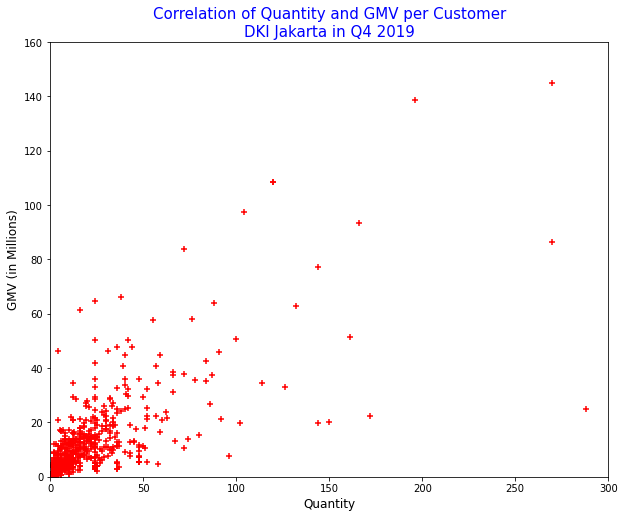

In [31]:
# correlation gmv and quantity
plt.figure(figsize=(10,8))
plt.scatter(analyze_customer['quantity'], analyze_customer['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('GMV (in Millions)', fontsize= 12)
plt.xlim(xmin=0, xmax=300)
plt.ylim(ymin=0, ymax=150000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

In [39]:
#mengambil informasi top 5 brands berdasarkan quantity
top_brands = (df[df['year_month']=='2019-12'].groupby('brand')['gmv']
                .sum()
                .reset_index()
                .sort_values(by='gmv',ascending=False)
                .head(5))

#membuat dataframe baru, filter hanya di bulan Desember 2019 dan hanya top 5 brands
dataset_top5brand_dec = top_brands[(top_brands['order_month']=='2019-12') & (top_brands['brand'].isin(top_brands['brand'].to_list()))]

# print top brands
print(dataset_top5brand_dec)

     brand         gmv
7  BRAND_R  1358124000
8  BRAND_S  1289261000
6  BRAND_P  1008256000
4  BRAND_J   798862000
2  BRAND_C   756636000


#### Challange Visualize

In [63]:
# Case 1: Menentukan brand top 5
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

#mengambil informasi top 5 brands berdasarkan quantity
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))

#membuat dataframe baru, filter hanya di bulan Desember 2019 dan hanya top 5 brands
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]

# print top brands
print(top_brands)

     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


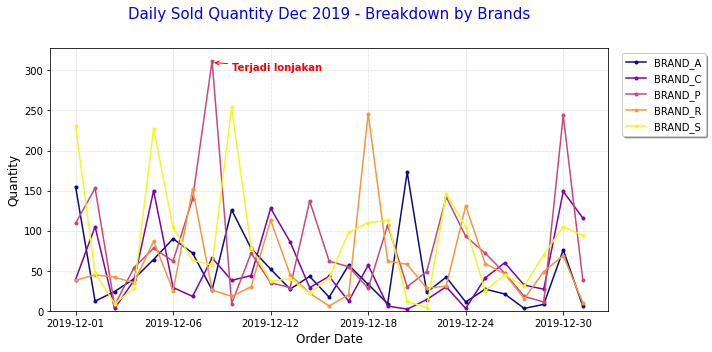

In [69]:
# Case 2: Multi-line chart daily quantity untuk brand top 5
# lanjutan visualize line chart quantity by brand
dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Daily Sold Quantity Dec 2019 - Breakdown by Brands',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Order Date', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('Terjadi lonjakan', xy=(7, 310), xytext=(8, 300),
             weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='red'))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

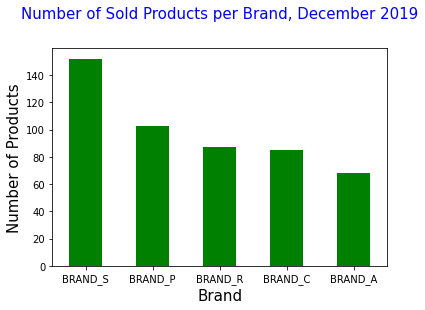

In [74]:
# Case 3: Kuantitas penjualan brand top 5 selama Desember 2019
dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

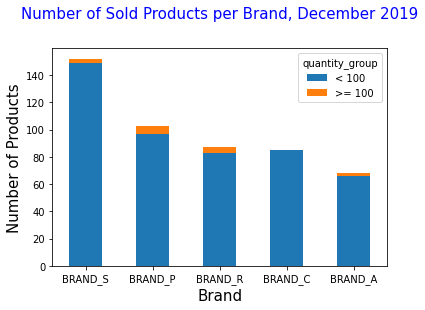

In [90]:
# Case 4: Penjulan produk diatas 100 dan dibawah 100 selama Desember 2019
#membuat dataframe baru, untuk agregat jumlah quantity terjual per product
dataset_top5brand_dec_per_product = dataset_top5brand_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()

#beri kolom baru untuk menandai product yang terjual >= 100 dan <100
dataset_top5brand_dec_per_product['quantity_group'] = dataset_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if x>=100 else '< 100')
dataset_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)
dataset_top5brand_dec_per_product

#membuat referensi pengurutan brand berdasarkan banyaknya semua product
s_sort = dataset_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

#plot stacked barchart
dataset_top5brand_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

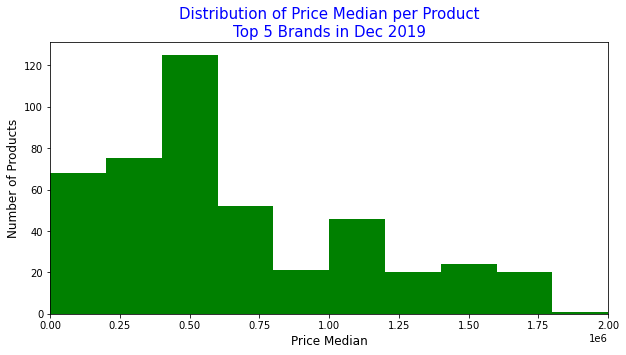

In [96]:
# Case 5: Murah atau mahalkah harga produk brand top 5
plt.figure(figsize=(10,5))
plt.hist(dataset_top5brand_dec.groupby('product_id')['item_price'].median(), bins=10, stacked=True, range=(1,2000000), color='green')
plt.title('Distribution of Price Median per Product\nTop 5 Brands in Dec 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Number of Products',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.show()

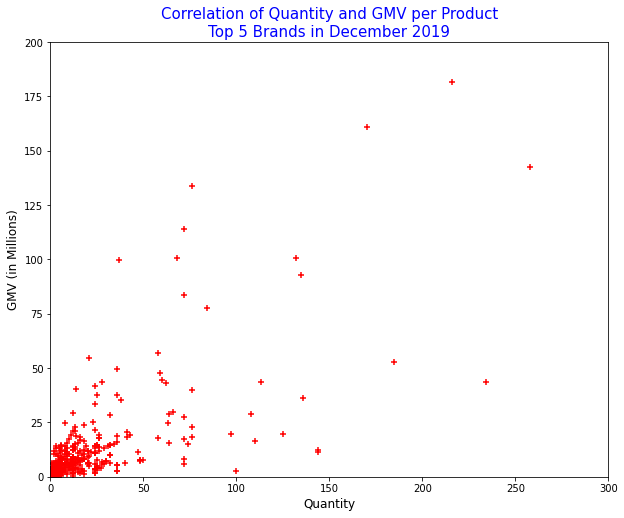

In [115]:
# Case 6a: Korelasi quantity vs GMV
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['quantity'],data_per_product_top5brand_dec['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0, xmax=300)
plt.ylim(ymin=0, ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

<Figure size 432x288 with 0 Axes>

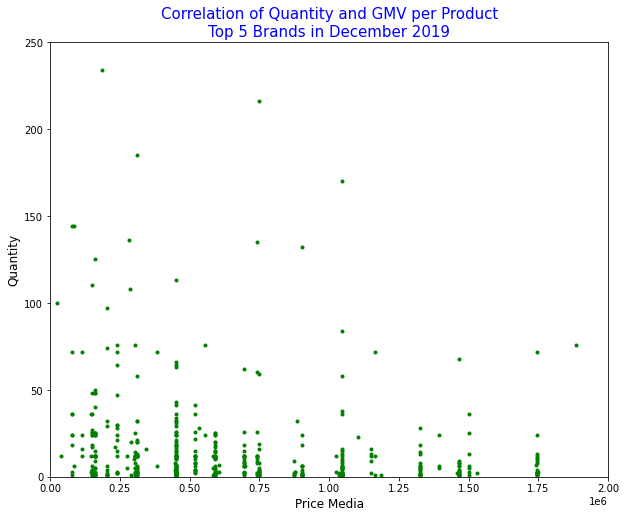

In [119]:
# Case 6b: Korelasi median harga vs quantity
plt.clf()
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['item_price'],data_per_product_top5brand_dec['quantity'], marker='o', color='green')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)
plt.show()